In [10]:
df = pd.read_parquet('../data/raw/yellow_tripdata_2023-01.parquet')
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [9]:
dfdemo.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.066766e+06,3066766,3066766,2.995023e+06,3.066766e+06,2.995023e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,2.995023e+06,2.995023e+06
mean,1.730215e+00,2023-01-17 00:22:26.288164,2023-01-17 00:38:06.427874,1.362532e+00,3.847342e+00,1.497440e+00,1.663980e+02,1.643926e+02,1.194483e+00,1.836707e+01,1.537842e+00,4.882900e-01,3.367941e+00,5.184907e-01,9.820847e-01,2.702038e+01,2.274231e+00,1.074086e-01
min,1.000000e+00,2008-12-31 23:01:42,2009-01-01 14:29:11,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-9.622000e+01,-6.500000e+01,-1.000000e+00,-7.510000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2023-01-09 16:21:57.250000,2023-01-09 16:37:06,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.540000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-01-17 08:42:29.500000,2023-01-17 08:58:30.500000,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.720000e+00,0.000000e+00,1.000000e+00,2.016000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-01-24 16:26:27,2023-01-24 16:42:49,1.000000e+00,3.330000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.200000e+00,0.000000e+00,1.000000e+00,2.870000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,2023-02-01 00:56:53,2023-02-02 09:28:47,9.000000e+00,2.589281e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.160100e+03,1.250000e+01,5.316000e+01,3.808000e+02,1.969900e+02,1.000000e+00,1.169400e+03,2.500000e+00,1.250000e+00
std,4.438480e-01,NaN,NaN,8.961200e-01,2.495838e+02,6.474767e+00,6.424413e+01,6.994368e+01,5.294762e-01,1.780782e+01,1.789592e+00,1.034641e-01,3.826759e+00,2.017579e+00,1.833529e-01,2.216359e+01,7.718454e-01,3.556511e-01


In [11]:
df['payment_type']

0          2
1          1
2          1
3          1
4          1
          ..
3066761    0
3066762    0
3066763    0
3066764    0
3066765    0
Name: payment_type, Length: 3066766, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet
import shap
import joblib

In [12]:
# 1. Load data
df = pd.read_parquet('../data/raw/yellow_tripdata_2023-01.parquet')

# 2. Filter and target
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()
df = df[(df['trip_duration'] >= 60) & (df['trip_duration'] <= 7200)]
y = df['trip_duration']

In [13]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,506.0
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,379.0
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,765.0
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,577.0
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,839.0
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,1167.0
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,1471.0
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,780.0


In [14]:
# 3. Feature engineering
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_weekday'] = df['tpep_pickup_datetime'].dt.weekday
df['is_weekend'] = df['pickup_weekday'].isin([5, 6]).astype(int)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day
df['month'] = df['tpep_pickup_datetime'].dt.month
df['is_peak'] = ((df['pickup_hour'].between(7,9)) | (df['pickup_hour'].between(16,18))).astype(int)

In [19]:

pd.set_option('display.max_columns', None) 
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,pickup_hour,pickup_weekday,is_weekend,pickup_day,month,is_peak
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,506.0,0,6,1,1,1,0
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,379.0,0,6,1,1,1,0
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,765.0,0,6,1,1,1,0
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,577.0,0,6,1,1,1,0
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,650.0,0,6,1,1,1,0


In [20]:
def time_of_day(hour):
    if hour < 6: return 'night'
    elif hour < 12: return 'morning'
    elif hour < 18: return 'afternoon'
    else: return 'evening'
df['time_of_day'] = df['pickup_hour'].apply(time_of_day)

In [21]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,pickup_hour,pickup_weekday,is_weekend,pickup_day,month,is_peak,time_of_day
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,506.0,0,6,1,1,1,0,night
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,379.0,0,6,1,1,1,0,night
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,765.0,0,6,1,1,1,0,night
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,577.0,0,6,1,1,1,0,night
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,650.0,0,6,1,1,1,0,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,839.0,23,1,0,31,1,0,evening
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,1167.0,23,1,0,31,1,0,evening
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,1471.0,23,1,0,31,1,0,evening
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,780.0,23,1,0,31,1,0,evening


In [ ]:
# 4. Feature selection
categorical_cols = [
    'VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type',
    'PULocationID', 'DOLocationID', 'time_of_day'
]
numerical_cols = [
    'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge',
    'pickup_hour', 'pickup_weekday', 'is_weekend', 'pickup_day', 'month', 'is_peak', 'manhattan_dist'
]
# Some columns might not always be present, so filter for existing ones
numerical_cols = [col for col in numerical_cols if col in df.columns]

# 5. Label encode categoricals
def prepare_features(X, categorical_cols):
    X_copy = X.copy()
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        X_copy[col] = le.fit_transform(X_copy[col].astype(str))
        label_encoders[col] = le
    return X_copy, label_encoders

X = df[categorical_cols + numerical_cols]
X_encoded, label_encoders = prepare_features(X, categorical_cols)

# 6. Standardize numerical columns
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

# 7. Split data
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 8. XGBoost hyperparameter tuning
param_grid = {
    'max_depth': [6, 8],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}
xgb_base = xgb.XGBRegressor(
    n_estimators=500,
    objective='reg:squarederror',
    early_stopping_rounds=20,
    random_state=42
)
grid_search = GridSearchCV(xgb_base, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

# 9. LightGBM model
lgb_model = lgb.LGBMRegressor(
    num_leaves=31,
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    learning_rate=0.05,
    n_estimators=500,
    min_child_samples=20,
    random_state=42
)
lgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=20, verbose=False)

# 10. Stacking ensemble
stack = StackingRegressor(
    estimators=[
        ('xgb', grid_search.best_estimator_),
        ('lgb', lgb_model)
    ],
    final_estimator=ElasticNet(alpha=0.001),
    n_jobs=-1
)
stack.fit(X_train, y_train)

# 11. Evaluation
def evaluate(model, X_val, y_val, name="Model"):
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)
    print(f"{name} - RMSE: {rmse:.2f}, R²: {r2:.4f}")
    return rmse, r2

print("\n--- Model Performance ---")
evaluate(grid_search.best_estimator_, X_val, y_val, "XGBoost Tuned")
evaluate(lgb_model, X_val, y_val, "LightGBM")
evaluate(stack, X_val, y_val, "Stacking Ensemble")

# 12. SHAP Feature Importance (for XGBoost)
print("\n--- SHAP Feature Importance (XGBoost) ---")
explainer = shap.Explainer(grid_search.best_estimator_)
shap_values = explainer(X_val)
shap.summary_plot(shap_values, X_val, show=False)  # Use show=True to display plot in notebook

# 13. Save model
joblib.dump(stack, 'stacked_trip_duration_model.pkl')

In [20]:
!uv pip install shap

Using Python 3.11.9 environment at: C:\Yellow Taxi Project\SimpleOps\project\.venv
Resolved 19 packages in 642ms
Prepared 4 packages in 6.56s
Installed 5 packages in 129ms
 + llvmlite==0.44.0
 + numba==0.61.2
 + shap==0.47.2
 + slicer==0.0.8
 + tqdm==4.67.1


In [5]:
!uv pip install xgboost lightgbm shap

Using Python 3.11.9 environment at: C:\Yellow Taxi Project\SimpleOps\project\.venv
Resolved 21 packages in 152ms
Installed 6 packages in 154ms
 + lightgbm==4.6.0
 + llvmlite==0.44.0
 + numba==0.61.2
 + shap==0.47.2
 + slicer==0.0.8
 + tqdm==4.67.1


In [24]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet
import joblib
from tqdm import tqdm

In [25]:
# 1. Load and preprocess data
df = pd.read_parquet('../data/raw/yellow_tripdata_2023-01.parquet')
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()
df = df[(df['trip_duration'] >= 60) & (df['trip_duration'] <= 7200)]

# Fill numerical columns with mean
for col in ['passenger_count', 'RatecodeID', 'congestion_surcharge', 'airport_fee']:
    df[col] = df[col].fillna(df[col].mean())

# Fill categorical column with mode
for col in ['store_and_fwd_flag']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Feature engineering
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_weekday'] = df['tpep_pickup_datetime'].dt.weekday
df['is_weekend'] = df['pickup_weekday'].isin([5, 6]).astype(int)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day
df['month'] = df['tpep_pickup_datetime'].dt.month
df['is_peak'] = ((df['pickup_hour'].between(7,9)) | (df['pickup_hour'].between(16,18))).astype(int)

def time_of_day(hour):
    if hour < 6: return 'night'
    elif hour < 12: return 'morning'
    elif hour < 18: return 'afternoon'
    else: return 'evening'
df['time_of_day'] = df['pickup_hour'].apply(time_of_day)

categorical_cols = [
    'VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type',
    'PULocationID', 'DOLocationID', 'time_of_day'
]
numerical_cols = [
    'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge',
    'pickup_hour', 'pickup_weekday', 'is_weekend', 'pickup_day', 'month', 'is_peak', 'manhattan_dist'
]
numerical_cols = [col for col in numerical_cols if col in df.columns]

# Label encode categoricals
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Standardize numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Prepare data
X = df[categorical_cols + numerical_cols]
y = df['trip_duration'].values.astype(np.float32)

In [26]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,pickup_hour,pickup_weekday,is_weekend,pickup_day,month,is_peak,time_of_day
0,1,2023-01-01 00:32:10,2023-01-01 00:40:36,-4.094028e-01,-0.011604,0,0,65,44,2,-0.524101,-0.306466,0.095552,-0.896696,-0.258475,0.089178,-0.587642,2.847782e-01,0.000000,506.0,-2.452327,1.505832,1.579878,-1.771856,-0.003078,-0.673582,3
1,1,2023-01-01 00:55:08,2023-01-01 01:01:27,-4.094028e-01,-0.011086,0,0,197,149,1,-0.605734,-0.306466,0.095552,0.167301,-0.258475,0.089178,-0.467077,2.847782e-01,0.000000,379.0,-2.452327,1.505832,1.579878,-1.771856,-0.003078,-0.673582,3
2,1,2023-01-01 00:25:04,2023-01-01 00:37:49,-4.094028e-01,-0.005470,0,0,202,150,1,-0.197571,-0.306466,0.095552,3.093291,-0.258475,0.089178,0.367601,2.847782e-01,0.000000,765.0,-2.452327,1.505832,1.579878,-1.771856,-0.003078,-0.673582,3
3,0,2023-01-01 00:03:48,2023-01-01 00:13:25,-1.539312e+00,-0.007900,0,0,39,228,1,-0.360836,3.186998,0.095552,-0.896696,-0.258475,0.089178,-0.283912,-3.119579e+00,1.250000,577.0,-2.452327,1.505832,1.579878,-1.771856,-0.003078,-0.673582,3
4,1,2023-01-01 00:10:29,2023-01-01 00:21:19,-4.094028e-01,-0.009772,0,0,6,238,1,-0.401653,-0.306466,0.095552,-0.024219,-0.258475,0.089178,-0.338166,2.847782e-01,0.000000,650.0,-2.452327,1.505832,1.579878,-1.771856,-0.003078,-0.673582,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,1,2023-01-31 23:58:34,2023-02-01 00:12:33,-5.017804e-16,-0.003320,1,0,6,204,0,-0.145093,-0.865420,0.095552,0.156661,-0.258475,0.089178,-0.148972,-1.209471e-15,0.107183,839.0,1.537137,-1.007257,-0.632960,1.676428,-0.003078,-0.673582,1
3066762,1,2023-01-31 23:31:09,2023-01-31 23:50:36,-5.017804e-16,0.007632,1,0,11,234,0,0.241495,-0.865420,0.095552,-0.194458,-0.258475,0.089178,0.097258,-1.209471e-15,0.107183,1167.0,1.537137,-1.007257,-0.632960,1.676428,-0.003078,-0.673582,1
3066763,1,2023-01-31 23:01:05,2023-01-31 23:25:36,-5.017804e-16,0.003132,1,0,13,151,0,-0.039554,-0.865420,0.095552,0.518419,-0.258475,0.089178,-0.001976,-1.209471e-15,0.107183,1471.0,1.537137,-1.007257,-0.632960,1.676428,-0.003078,-0.673582,1
3066764,1,2023-01-31 23:40:00,2023-01-31 23:53:00,-5.017804e-16,-0.002922,1,0,141,238,0,-0.008067,-0.865420,0.095552,0.281680,-0.258475,0.089178,-0.018206,-1.209471e-15,0.107183,780.0,1.537137,-1.007257,-0.632960,1.676428,-0.003078,-0.673582,1


In [3]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# ========== PyTorch Neural Network ==========
class TaxiDataset(Dataset):
    def __init__(self, X, y, categorical_cols, numerical_cols):
        self.X_cat = X[categorical_cols].values.astype(np.int64)
        self.X_num = X[numerical_cols].values.astype(np.float32)
        self.y = y.astype(np.float32)
    def __len__(self):
        return len(self.y)
    def __getitem__(self, idx):
        return self.X_cat[idx], self.X_num[idx], self.y[idx]

train_ds = TaxiDataset(X_train, y_train, categorical_cols, numerical_cols)
val_ds = TaxiDataset(X_val, y_val, categorical_cols, numerical_cols)
train_loader = DataLoader(train_ds, batch_size=2048, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size=2048, shuffle=False, num_workers=2, pin_memory=True)

cat_dims = [int(df[col].nunique()) for col in categorical_cols]
emb_dims = [(x, min(50, (x+1)//2)) for x in cat_dims]

In [5]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm

# Print CUDA info for debugging
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
print("CUDA device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")

class TaxiNet(nn.Module):
    def __init__(self, emb_dims, n_num):
        super().__init__()
        self.embeddings = nn.ModuleList([nn.Embedding(x, y) for x, y in emb_dims])
        emb_dim_sum = sum([y for x, y in emb_dims])
        self.fc = nn.Sequential(
            nn.Linear(emb_dim_sum + n_num, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 1)
        )
    def forward(self, x_cat, x_num):
        x = [emb(x_cat[:, i]) for i, emb in enumerate(self.embeddings)]
        x = torch.cat(x, 1)
        x = torch.cat([x, x_num], 1)
        return self.fc(x).squeeze(1)

# Set device and move model to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TaxiNet(emb_dims, len(numerical_cols)).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-3)
criterion = nn.MSELoss()

# Use a reasonable batch size and num_workers=0 for debugging
BATCH_SIZE = 1024
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

# Training loop with tqdm and early stopping
best_r2 = -np.inf
patience, patience_counter = 20, 0
EPOCHS = 20

for epoch in range(EPOCHS):
    model.train()
    train_losses = []
    for x_cat, x_num, y_batch in tqdm(train_loader, desc=f"Epoch {epoch+1} [Train]"):
        x_cat, x_num, y_batch = x_cat.to(device), x_num.to(device), y_batch.to(device)
        optimizer.zero_grad()
        preds = model(x_cat, x_num)
        loss = criterion(preds, y_batch)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    model.eval()
    val_preds = []
    val_targets = []
    with torch.no_grad():
        for x_cat, x_num, y_batch in tqdm(val_loader, desc=f"Epoch {epoch+1} [Val]"):
            x_cat, x_num = x_cat.to(device), x_num.to(device)
            preds = model(x_cat, x_num).cpu().numpy()
            val_preds.append(preds)
            val_targets.append(y_batch.numpy())
    val_preds = np.concatenate(val_preds)
    val_targets = np.concatenate(val_targets)
    val_rmse = np.sqrt(mean_squared_error(val_targets, val_preds))
    val_r2 = r2_score(val_targets, val_preds)
    print(f"Epoch {epoch+1:02d} | Train Loss: {np.mean(train_losses):.4f} | Val RMSE: {val_rmse:.2f} | Val R2: {val_r2:.4f}")
    if val_r2 > best_r2:
        best_r2 = val_r2
        patience_counter = 0
        torch.save(model.state_dict(), 'best_taxi_model.pt')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

# Load best model and get predictions for stacking
model.load_state_dict(torch.load('best_taxi_model.pt'))
model.eval()

def get_nn_preds(X_df):
    ds = TaxiDataset(X_df, np.zeros(len(X_df)), categorical_cols, numerical_cols)
    dl = DataLoader(ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
    preds = []
    with torch.no_grad():
        for x_cat, x_num, _ in tqdm(dl, desc="Predicting"):
            x_cat, x_num = x_cat.to(device), x_num.to(device)
            batch_preds = model(x_cat, x_num).cpu().numpy()
            preds.append(batch_preds)
    return np.concatenate(preds)

PyTorch version: 2.5.1+cu121
CUDA available: True
CUDA device count: 1
CUDA device name: NVIDIA GeForce RTX 4050 Laptop GPU


Epoch 1 [Val]: 100%|████████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 171.31it/s]


Epoch 01 | Train Loss: 312780.8471 | Val RMSE: 286.06 | Val R2: 0.8333


Epoch 2 [Val]: 100%|████████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 168.77it/s]


Epoch 02 | Train Loss: 51399.3390 | Val RMSE: 230.57 | Val R2: 0.8917


Epoch 3 [Val]: 100%|████████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 170.78it/s]


Epoch 03 | Train Loss: 48662.4443 | Val RMSE: 2672.55 | Val R2: -13.5514


Epoch 4 [Val]: 100%|████████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 168.44it/s]


Epoch 04 | Train Loss: 47343.5365 | Val RMSE: 253.63 | Val R2: 0.8689


Epoch 5 [Val]: 100%|████████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 166.39it/s]


Epoch 05 | Train Loss: 46002.8409 | Val RMSE: 229.51 | Val R2: 0.8927


Epoch 6 [Val]: 100%|████████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 172.15it/s]


Epoch 06 | Train Loss: 44428.1797 | Val RMSE: 2669.33 | Val R2: -13.5164


Epoch 7 [Val]: 100%|████████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 167.61it/s]


Epoch 07 | Train Loss: 40857.9414 | Val RMSE: 1470.15 | Val R2: -3.4033


Epoch 8 [Val]: 100%|████████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 171.94it/s]


Epoch 08 | Train Loss: 39016.9277 | Val RMSE: 3206.71 | Val R2: -19.9495


Epoch 9 [Val]: 100%|████████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 168.10it/s]


Epoch 09 | Train Loss: 37798.8589 | Val RMSE: 1925.54 | Val R2: -6.5537


Epoch 10 [Val]: 100%|███████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 170.14it/s]


Epoch 10 | Train Loss: 37057.9856 | Val RMSE: 681.58 | Val R2: 0.0536


Epoch 11 [Val]: 100%|███████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 170.81it/s]


Epoch 11 | Train Loss: 36574.2221 | Val RMSE: 445.87 | Val R2: 0.5950


Epoch 12 [Val]: 100%|███████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 167.48it/s]


Epoch 12 | Train Loss: 36251.3396 | Val RMSE: 445.22 | Val R2: 0.5962


Epoch 13 [Val]: 100%|███████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 169.38it/s]


Epoch 13 | Train Loss: 35969.5374 | Val RMSE: 369.20 | Val R2: 0.7223


Epoch 14 [Val]: 100%|███████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 168.21it/s]


Epoch 14 | Train Loss: 35745.2682 | Val RMSE: 426.91 | Val R2: 0.6287


Epoch 15 [Val]: 100%|███████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 165.59it/s]


Epoch 15 | Train Loss: 35443.5455 | Val RMSE: 629.53 | Val R2: 0.1926


Epoch 16 [Val]: 100%|███████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 168.91it/s]


Epoch 16 | Train Loss: 35263.2008 | Val RMSE: 1237.81 | Val R2: -2.1215


Epoch 17 [Val]: 100%|███████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 173.86it/s]


Epoch 17 | Train Loss: 35103.2460 | Val RMSE: 297.05 | Val R2: 0.8202


Epoch 18 [Val]: 100%|███████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 166.67it/s]


Epoch 18 | Train Loss: 34961.0148 | Val RMSE: 784.91 | Val R2: -0.2551


Epoch 19 [Val]: 100%|███████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 167.03it/s]


Epoch 19 | Train Loss: 34769.4865 | Val RMSE: 1546.15 | Val R2: -3.8703


Epoch 20 [Val]: 100%|███████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 163.79it/s]

Epoch 20 | Train Loss: 34794.4863 | Val RMSE: 2202.37 | Val R2: -8.8818



C:\Users\Sriram\AppData\Local\Temp\ipykernel_72660\202778004.py:87: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_taxi_model.pt'))


In [6]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# After training and loading best model weights
model.load_state_dict(torch.load('best_taxi_model.pt'))
model.eval()

# Get predictions on validation set
val_preds = []
val_targets = []
with torch.no_grad():
    for x_cat, x_num, y_batch in val_loader:
        x_cat, x_num = x_cat.to(device), x_num.to(device)
        preds = model(x_cat, x_num).cpu().numpy()
        val_preds.append(preds)
        val_targets.append(y_batch.numpy())
val_preds = np.concatenate(val_preds)
val_targets = np.concatenate(val_targets)

# Remove any NaNs just in case
mask = ~np.isnan(val_preds) & ~np.isnan(val_targets)
val_preds = val_preds[mask]
val_targets = val_targets[mask]

# Calculate RMSE and R²
rmse = np.sqrt(mean_squared_error(val_targets, val_preds))
r2 = r2_score(val_targets, val_preds)
print(f"PyTorch NN - RMSE: {rmse:.2f}, R²: {r2:.4f}")


C:\Users\Sriram\AppData\Local\Temp\ipykernel_72660\380585576.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_taxi_model.pt'))


PyTorch NN - RMSE: 229.51, R²: 0.8927


In [7]:
# ========== XGBoost with GPU ==========
xgb_model = xgb.XGBRegressor(
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    n_estimators=500,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42,
    early_stopping_rounds=20
)
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

C:\Yellow Taxi Project\SimpleOps\project\.venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [19:11:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()
C:\Yellow Taxi Project\SimpleOps\project\.venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [19:11:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=20,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on validation set
y_pred = xgb_model.predict(X_val)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Compute R² score
r2 = r2_score(y_val, y_pred)

print(f"XGBoost (GPU) - RMSE: {rmse:.2f}, R²: {r2:.4f}")

XGBoost (GPU) - RMSE: 167.64, R²: 0.9427


C:\Yellow Taxi Project\SimpleOps\project\.venv\Lib\site-packages\xgboost\core.py:2676: UserWarning: [19:11:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
C:\Yellow Taxi Project\SimpleOps\project\.venv\Lib\site-packages\xgboost\core.py:729: UserWarning: [19:11:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

 

In [9]:
# ========== LightGBM with GPU ==========
lgb_model = lgb.LGBMRegressor(
    device='gpu',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=500,
    min_child_samples=20,
    early_stopping_rounds=20,
    random_state=42,
)
lgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1740
[LightGBM] [Info] Number of data points in the train set: 2341408, number of used features: 22
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4050 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 12 dense feature groups (26.80 MB) transferred to GPU in 0.028124 secs. 1 sparse feature groups
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Info] Start training from score 897.793996
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's l2: 31627.4

LGBMRegressor(device='gpu', early_stopping_rounds=20, learning_rate=0.05,
              n_estimators=500, random_state=42)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on validation set
y_pred = lgb_model.predict(X_val)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Compute R² score
r2 = r2_score(y_val, y_pred)

print(f"LGB_Model (GPU) - RMSE: {rmse:.2f}, R²: {r2:.4f}")

LGB_Model (GPU) - RMSE: 177.84, R²: 0.9356


In [11]:
pd.DataFrame({'y_val': y_val, 'y_pred': y_pred}).to_csv('data.csv')

C:\Users\Sriram\AppData\Local\Temp\ipykernel_72660\2628165601.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['y_val'], label='Actual (y_val)', shade=True)
C:\Users\Sriram\AppData\Local\Temp\ipykernel_72660\2628165601.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['y_pred'], label='Predicted (y_pred)', shade=True)


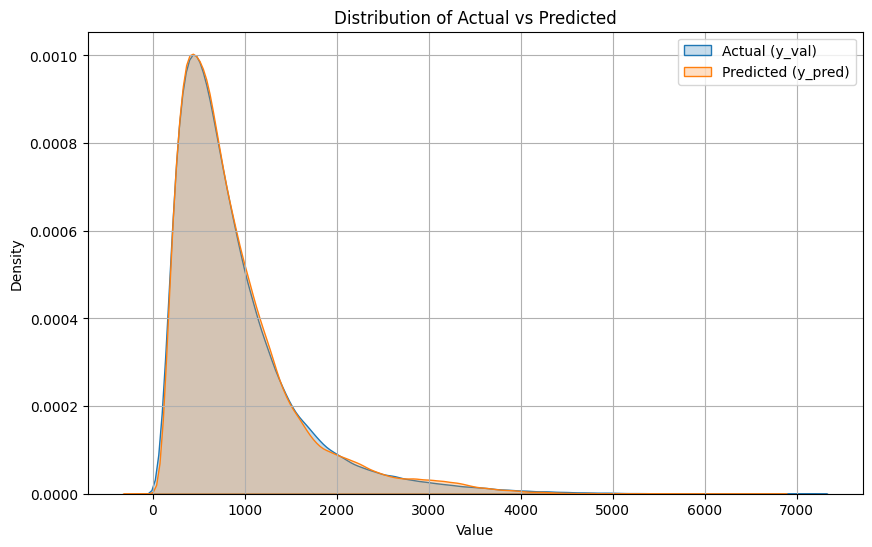

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_val and y_pred are lists, Series, or arrays
df = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})

plt.figure(figsize=(10, 6))
sns.kdeplot(df['y_val'], label='Actual (y_val)', shade=True)
sns.kdeplot(df['y_pred'], label='Predicted (y_pred)', shade=True)
plt.title('Distribution of Actual vs Predicted')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
!uv pip install pytorch-tabnet

Using Python 3.11.9 environment at: C:\Yellow Taxi Project\SimpleOps\project\.venv
Resolved 17 packages in 823ms
Prepared 1 package in 43ms
Installed 1 package in 47ms
 + pytorch-tabnet==4.1.0


In [16]:
from pytorch_tabnet.tab_model import TabNetRegressor

tabnet = TabNetRegressor(device_name='cuda' if torch.cuda.is_available() else 'cpu')
tabnet.fit(
    X_train.values, y_train.reshape(-1, 1),
    eval_set=[(X_val.values, y_val.reshape(-1, 1))],
    eval_metric=['rmse'],
    max_epochs=20,
    patience=5,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0
)
tabnet_pred = tabnet.predict(X_val.values).squeeze()
print(f"TabNet RMSE: {np.sqrt(mean_squared_error(y_val, tabnet_pred)):.2f}, R²: {r2_score(y_val, tabnet_pred):.4f}")


C:\Yellow Taxi Project\SimpleOps\project\.venv\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 117055.18316| val_0_rmse: 590.12692|  0:01:42s
epoch 1  | loss: 48208.36725| val_0_rmse: 520.65323|  0:03:17s
epoch 2  | loss: 44985.08344| val_0_rmse: 615.97824|  0:04:51s
epoch 3  | loss: 43391.12136| val_0_rmse: 1168.31396|  0:06:30s
epoch 4  | loss: 42475.24715| val_0_rmse: 732.20856|  0:08:05s
epoch 5  | loss: 42586.05631| val_0_rmse: 630.50397|  0:09:36s
epoch 6  | loss: 41754.16735| val_0_rmse: 605.67403|  0:11:05s

Early stopping occurred at epoch 6 with best_epoch = 1 and best_val_0_rmse = 520.65323


C:\Yellow Taxi Project\SimpleOps\project\.venv\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


TabNet RMSE: 520.65, R²: 0.4477


In [17]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ridge Regression
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_val)
print(f"Ridge RMSE: {np.sqrt(mean_squared_error(y_val, ridge_pred)):.2f}, R²: {r2_score(y_val, ridge_pred):.4f}")

# Lasso Regression
lasso = Lasso(alpha=0.1, random_state=42, max_iter=10000)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_val)
print(f"Lasso RMSE: {np.sqrt(mean_squared_error(y_val, lasso_pred)):.2f}, R²: {r2_score(y_val, lasso_pred):.4f}")

# ElasticNet Regression
enet = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42, max_iter=10000)
enet.fit(X_train, y_train)
enet_pred = enet.predict(X_val)
print(f"ElasticNet RMSE: {np.sqrt(mean_squared_error(y_val, enet_pred)):.2f}, R²: {r2_score(y_val, enet_pred):.4f}")


Ridge RMSE: 381.09, R²: 0.7041
Lasso RMSE: 381.25, R²: 0.7039
ElasticNet RMSE: 388.07, R²: 0.6932
